In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']

In [94]:
# 读取数据
data = pd.read_excel('data_灌木.xlsx')

# 灌木

### 分别使用NDVI、EVI、SAVI、OSAVI、RVI对总鲜重进行回归分析

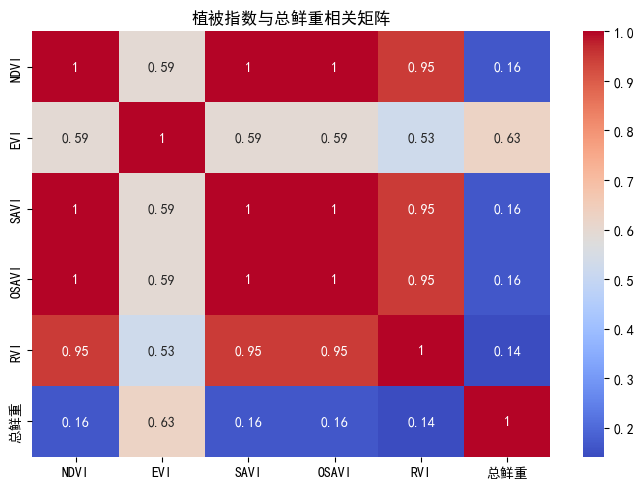

In [95]:
import seaborn as sns

# 计算相关矩阵
corr_matrix = data[['NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI', '总鲜重']].corr()

# 绘制热力图

fig, axes = plt.subplots(1, 1, figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes)
axes.set_title('植被指数与总鲜重相关矩阵')
plt.tight_layout()
plt.show()
#保存热力图
fig.savefig('correlation_heatmap.png', dpi=300)

特征: ['NDVI']，R2: -0.221


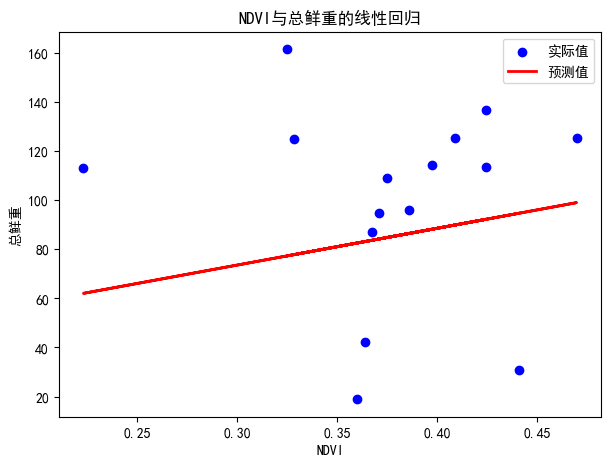

In [96]:
def linear_regression_plot(data, features, target='总鲜重', test_size=0.25, random_state=42):
    X = data[features]
    y = data[target]
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # 创建并训练线性回归模型
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # 预测
    y_pred = model.predict(X_test)
    
    # 计算评估指标
    r2 = r2_score(y_test, y_pred)
    print(f'特征: {features}，R2: {r2:.3f}')
    
    # 绘制回归图
    plt.figure(figsize=(7, 5))
    plt.scatter(X_test[features[0]], y_test, color='blue', label='实际值')
    plt.plot(X_test[features[0]], y_pred, color='red', linewidth=2, label='预测值')
    plt.xlabel(features[0])
    plt.ylabel(target)
    plt.title(f'{features[0]}与{target}的线性回归')
    plt.legend()

    plt.savefig(f'linear_{features[0]}.png', dpi=300)

    plt.show()

# 示例调用
linear_regression_plot(data, ['NDVI'])

特征: ['EVI']，R2: 0.503


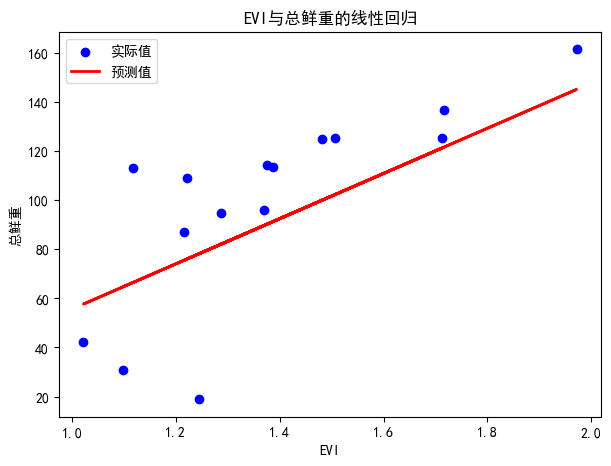

In [97]:
linear_regression_plot(data, ['EVI'])

特征: ['SAVI']，R2: -0.221


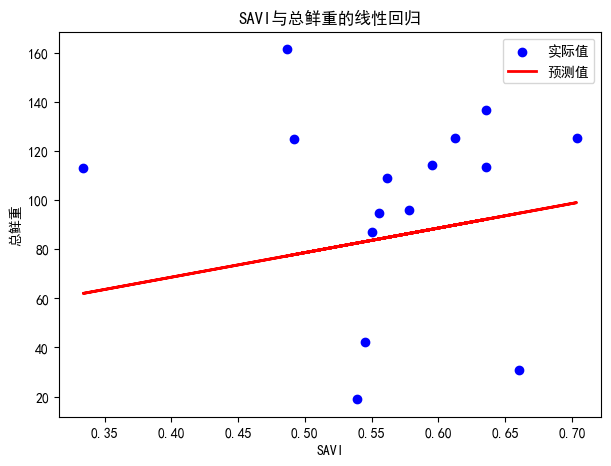

In [98]:
linear_regression_plot(data, ['SAVI'])

特征: ['OSAVI']，R2: -0.221


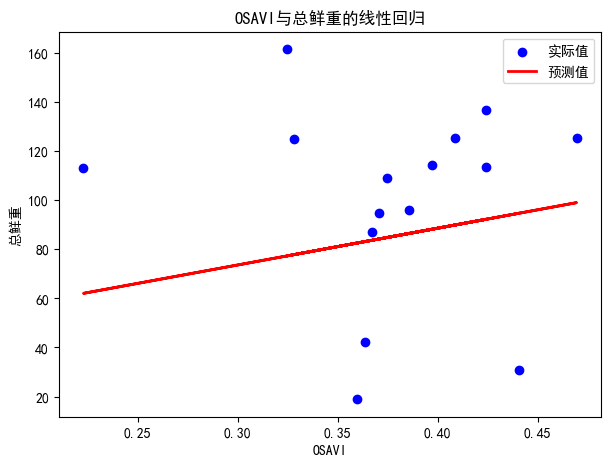

In [99]:
linear_regression_plot(data, ['OSAVI'])

特征: ['RVI']，R2: -0.140


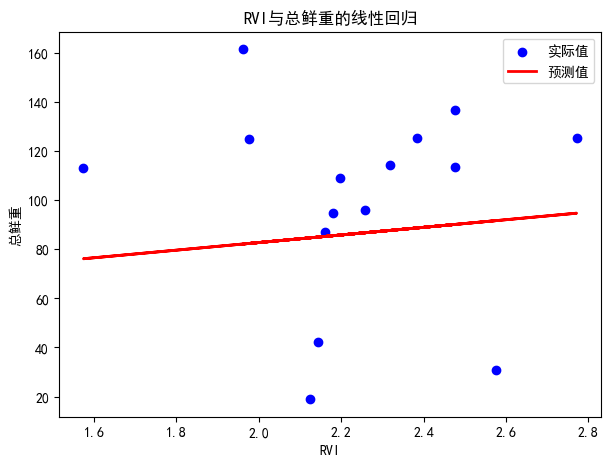

In [100]:
linear_regression_plot(data, ['RVI'])

## 多元线性回归

特征: ['NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI']，R2: 0.419


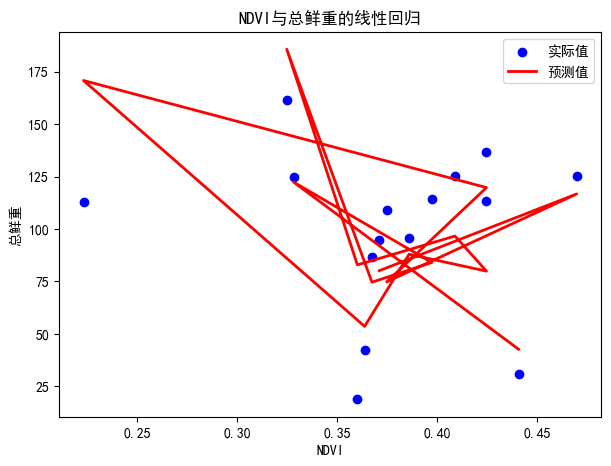

In [101]:
#采用多元线性回归'NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI'与总鲜重进行回归分析
def linear_regression_plot_plus(data, features, target='总鲜重', test_size=0.25, random_state=42):
    X = data[features]
    y = data[target]
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # 创建并训练线性回归模型
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # 预测
    y_pred = model.predict(X_test)
    
    # 计算评估指标
    r2 = r2_score(y_test, y_pred)
    print(f'特征: {features}，R2: {r2:.3f}')
    
    # 绘制回归图
    plt.figure(figsize=(7, 5))
    plt.scatter(X_test[features[0]], y_test, color='blue', label='实际值')
    plt.plot(X_test[features[0]], y_pred, color='red', linewidth=2, label='预测值')
    plt.xlabel(features[0])
    plt.ylabel(target)
    plt.title(f'{features[0]}与{target}的线性回归')
    plt.legend()

    plt.savefig(f'linear_plus_{features[0]}.png', dpi=300)

    plt.show()
linear_regression_plot_plus(data, ['NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI'])

## 随机森林

特征: ['NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI']，R2: 0.429


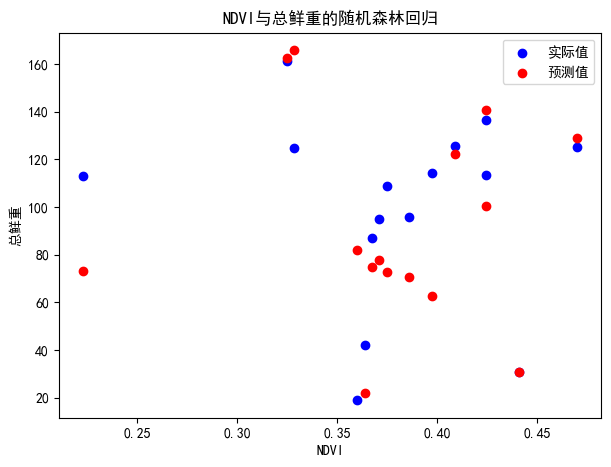

In [102]:
#采用随机森林回归 'NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI' 与总鲜重进行回归分析
from sklearn.ensemble import RandomForestRegressor

def random_forest_regression_plot(data, features, target='总鲜重', test_size=0.25, random_state=42):
    X = data[features]
    y = data[target]
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # 创建并训练随机森林回归模型
    model = RandomForestRegressor(random_state=random_state)
    model.fit(X_train, y_train)
    
    # 预测
    y_pred = model.predict(X_test)
    
    # 计算评估指标
    r2 = r2_score(y_test, y_pred)
    print(f'特征: {features}，R2: {r2:.3f}')
    
    # 绘制回归图
    plt.figure(figsize=(7, 5))
    plt.scatter(X_test[features[0]], y_test, color='blue', label='实际值')
    plt.scatter(X_test[features[0]], y_pred, color='red', label='预测值')
    plt.xlabel(features[0])
    plt.ylabel(target)
    plt.title(f'{features[0]}与{target}的随机森林回归')
    plt.legend()

    plt.savefig(f'random_forest_regression_{features[0]}.png', dpi=300)

    plt.show()


random_forest_regression_plot(data, ['NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI'])


## 支持向量机

特征: ['NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI']，R2: 0.033


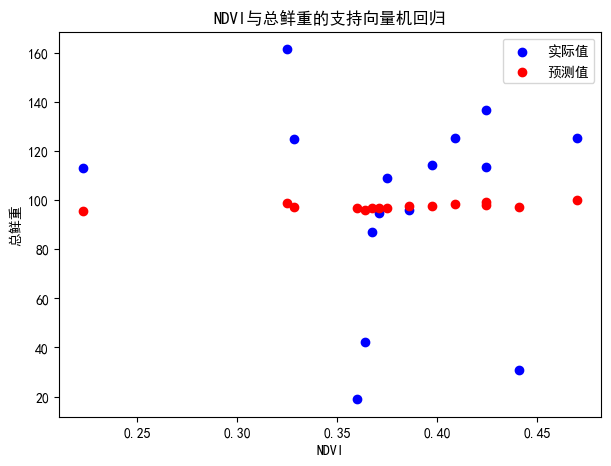

In [103]:
#采用支持向量机回归 'NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI' 与总鲜重进行回归分析
from sklearn.svm import SVR
def svr_regression_plot(data, features, target='总鲜重', test_size=0.25, random_state=42):
    X = data[features]
    y = data[target]
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # 创建并训练支持向量机回归模型
    model = SVR()
    model.fit(X_train, y_train)
    
    # 预测
    y_pred = model.predict(X_test)
    
    # 计算评估指标
    r2 = r2_score(y_test, y_pred)
    print(f'特征: {features}，R2: {r2:.3f}')
    
    # 绘制回归图
    plt.figure(figsize=(7, 5))
    plt.scatter(X_test[features[0]], y_test, color='blue', label='实际值')
    plt.scatter(X_test[features[0]], y_pred, color='red', label='预测值')
    plt.xlabel(features[0])
    plt.ylabel(target)
    plt.title(f'{features[0]}与{target}的支持向量机回归')
    plt.legend()
    plt.savefig(f'svr_regression_{features[0]}.png', dpi=300)
    plt.show()


svr_regression_plot(data, ['NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI'])

## lasso回归

特征: ['NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI']，R2: 0.642


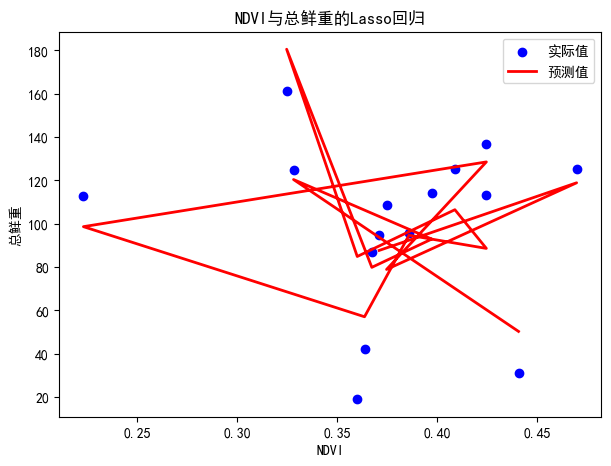

In [104]:
#采用lasso回归 'NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI' 与总鲜重进行回归分析
from sklearn.linear_model import Lasso
def lasso_regression_plot(data, features, target='总鲜重', test_size=0.25, random_state=42, alpha=0.1):
    X = data[features]
    y = data[target]
    
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # 创建并训练Lasso回归模型
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    
    # 预测
    y_pred = model.predict(X_test)
    
    # 计算评估指标
    r2 = r2_score(y_test, y_pred)
    print(f'特征: {features}，R2: {r2:.3f}')
    
    # 绘制回归图
    plt.figure(figsize=(7, 5))
    plt.scatter(X_test[features[0]], y_test, color='blue', label='实际值')
    plt.plot(X_test[features[0]], y_pred, color='red', linewidth=2, label='预测值')
    plt.xlabel(features[0])
    plt.ylabel(target)
    plt.title(f'{features[0]}与{target}的Lasso回归')
    plt.legend()
    # 保存回归图
    plt.savefig(f'lasso_regression_{features[0]}.png', dpi=300)
    plt.show()



lasso_regression_plot(data, ['NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI'])

# 草地

In [105]:
data1 = pd.read_excel('data_草地.xlsx')

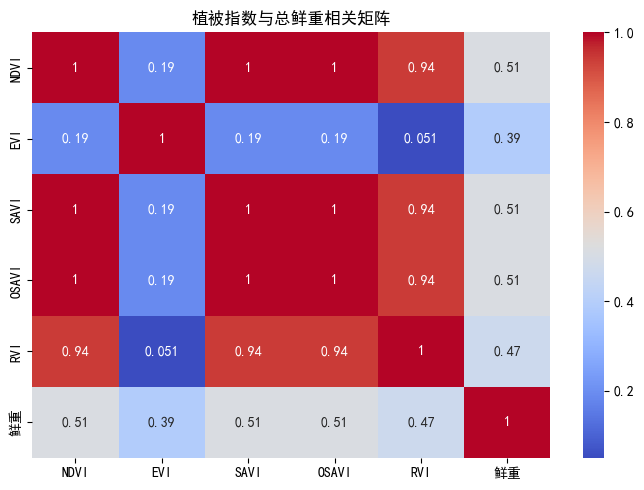

In [106]:
import seaborn as sns

# 计算相关矩阵
corr_matrix = data1[['NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI', '鲜重']].corr()

# 绘制热力图

fig, axes = plt.subplots(1, 1, figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes)
axes.set_title('植被指数与总鲜重相关矩阵')
plt.tight_layout()
plt.show()

#保存热力图
fig.savefig('correlation_heatmap_草地.png', dpi=300)

特征: ['NDVI']，R2: -1.896


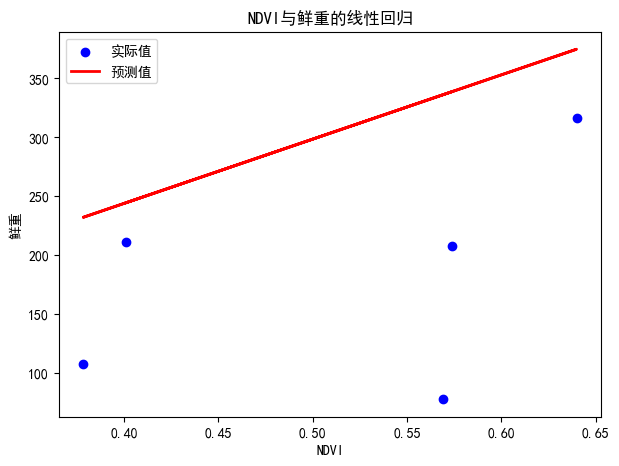

In [107]:
linear_regression_plot(data1, ['NDVI'], target='鲜重')

特征: ['EVI']，R2: -1.846


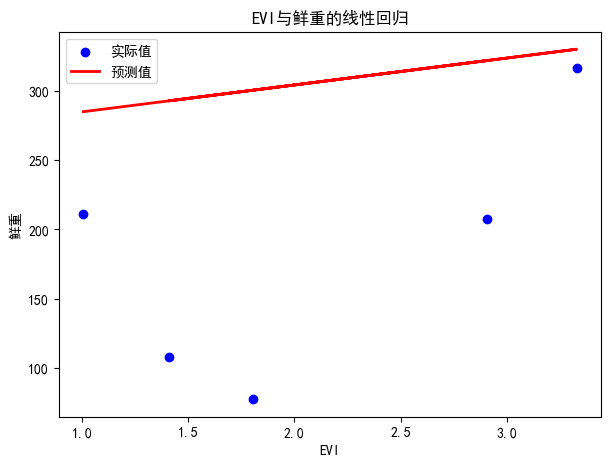

In [108]:
linear_regression_plot(data1, ['EVI'], target='鲜重')

特征: ['SAVI']，R2: -1.896


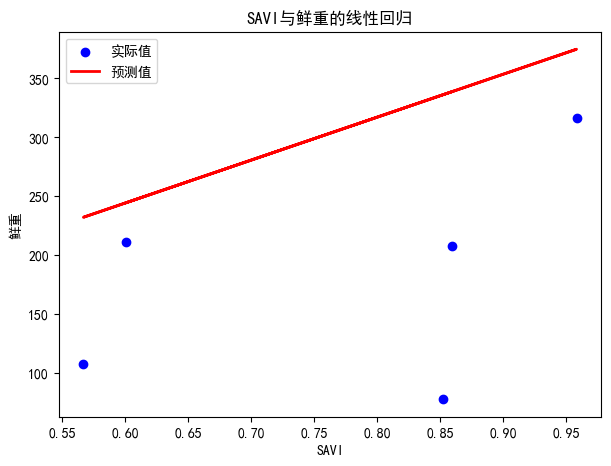

In [109]:
linear_regression_plot(data1, ['SAVI'], target='鲜重')

特征: ['OSAVI']，R2: -1.896


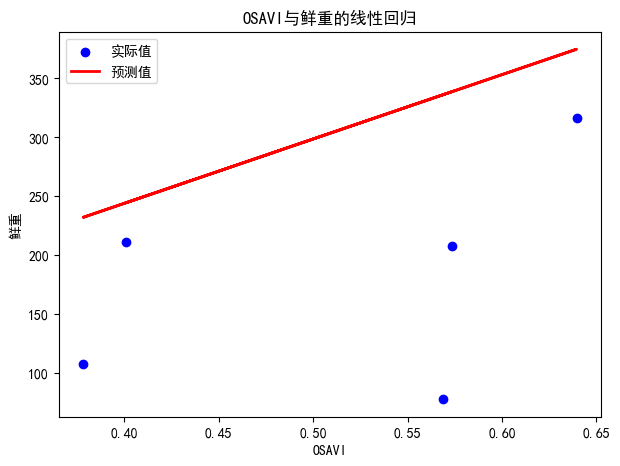

In [110]:
linear_regression_plot(data1, ['OSAVI'], target='鲜重')

特征: ['RVI']，R2: -1.455


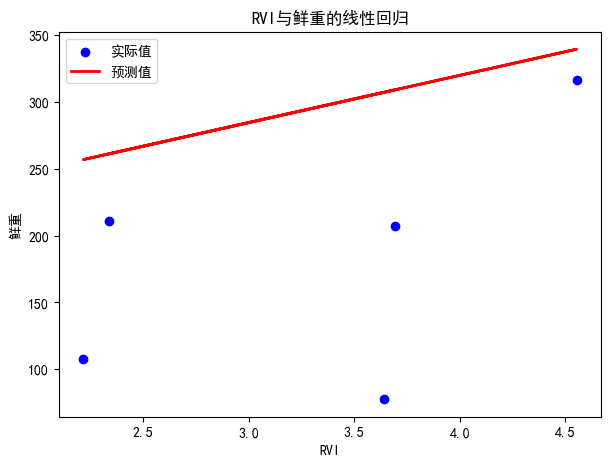

In [111]:
linear_regression_plot(data1, ['RVI'], target='鲜重')

特征: ['NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI']，R2: -1.112


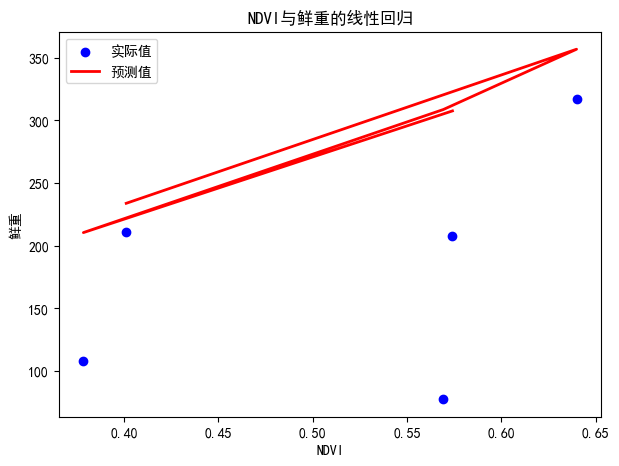

In [112]:
#多元线性回归
linear_regression_plot_plus(data1, ['NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI'], target='鲜重')

特征: ['NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI']，R2: -4.341


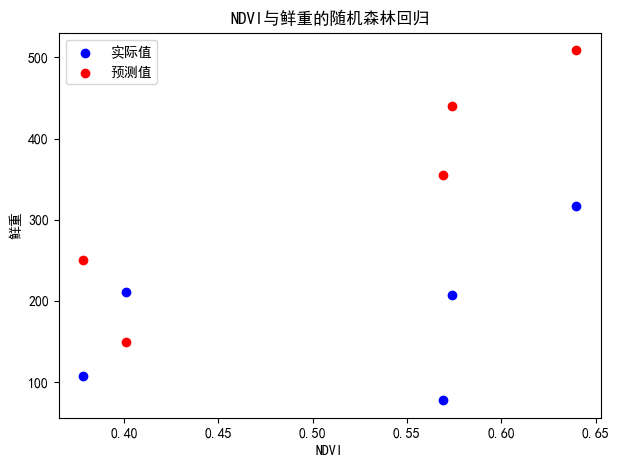

In [113]:
#随机森林回归
random_forest_regression_plot(data1, ['NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI'], target='鲜重')

特征: ['NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI']，R2: -3.922


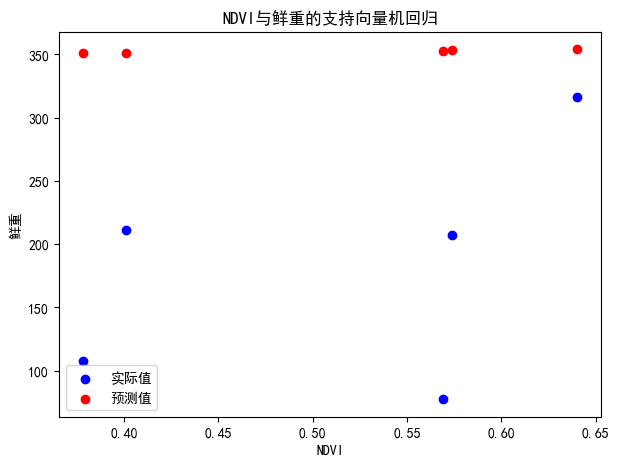

In [114]:
#支持向量机回归
svr_regression_plot(data1, ['NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI'], target='鲜重')

特征: ['NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI']，R2: -1.895


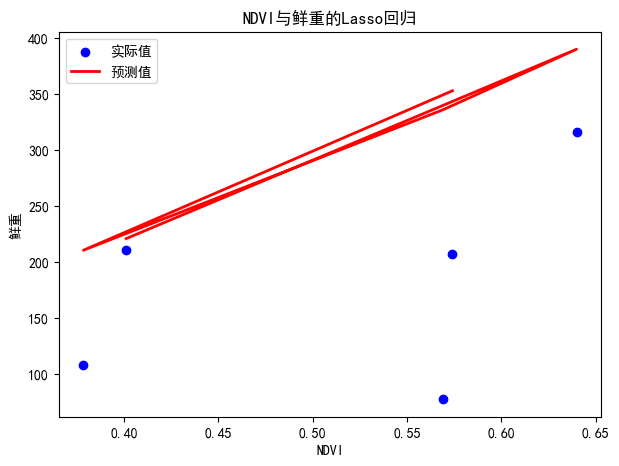

In [115]:
#lasso回归
lasso_regression_plot(data1, ['NDVI', 'EVI', 'SAVI', 'OSAVI', 'RVI'], target='鲜重')